In [45]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [46]:
# Read the file named "pci_thesis_cleaned.csv" into a Pandas dataframe

# Drop S.N and save to new csv file


df = pd.read_csv('24-pci-thesis.csv')
df.drop(['S.N'],axis=1,inplace=True)

# df.drop(159,axis=0,inplace=True)

df.replace({'.0.16': 0.16, '0..66': 0.66, '..45': 0.45},inplace=True)

df.dropna(axis=0, inplace=True)
# df.drop(df[df['AC3'] == '#VALUE!'].index[0], axis= 0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')


df.to_csv('24-pci-thesis-cleaned.csv',index=False)
# Load the data set
df = pd.read_csv('24-pci-thesis-cleaned.csv')

any nan = False
all finite = True


In [47]:
# Take a quick look at the dataset
df.head()

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,...,F1,F2,F3,G1,G2,G3,H1,H2,H3,PCI
0,0.0,1.45,0.0,0.00,0.00,0.0,0.0,2.35,0.00,0.00,...,0.0,0.00,1.01,0.0,0.0,0.00,0.00,0.00,1.55,36.0
1,0.0,1.47,0.0,0.00,0.00,0.0,0.0,0.12,0.00,0.00,...,0.0,0.00,0.09,0.0,0.0,0.00,2.22,0.00,1.25,56.0
2,0.0,0.80,0.0,0.75,2.91,0.0,0.0,0.13,0.00,0.74,...,0.0,0.00,0.60,0.0,0.0,0.26,0.00,0.00,0.33,46.0
3,0.0,7.65,0.0,0.00,0.00,0.0,0.0,4.32,2.99,0.00,...,0.0,0.25,0.00,0.0,0.0,0.00,0.00,2.97,0.00,45.0
4,0.0,0.10,0.0,0.00,0.00,0.0,0.0,1.23,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.32,0.00,87.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      318 non-null    float64
 1   A2      318 non-null    float64
 2   A3      318 non-null    float64
 3   B1      318 non-null    float64
 4   B2      318 non-null    float64
 5   B3      318 non-null    float64
 6   C1      318 non-null    float64
 7   C2      318 non-null    float64
 8   C3      318 non-null    float64
 9   D1      318 non-null    float64
 10  D2      318 non-null    float64
 11  D3      318 non-null    float64
 12  E1      318 non-null    float64
 13  E2      318 non-null    float64
 14  E3      318 non-null    float64
 15  F1      318 non-null    float64
 16  F2      318 non-null    float64
 17  F3      318 non-null    float64
 18  G1      318 non-null    float64
 19  G2      318 non-null    float64
 20  G3      318 non-null    float64
 21  H1      318 non-null    float64
 22  H2

In [49]:
df.describe()

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,...,F1,F2,F3,G1,G2,G3,H1,H2,H3,PCI
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,...,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.00000,318.000000,318.000000
mean,0.105101,0.288538,0.202189,0.094355,0.260175,0.225752,0.305368,0.449217,0.474775,0.173769,...,0.050704,0.028252,0.040321,0.034843,0.064487,0.089496,0.071217,0.20833,0.119579,57.399371
std,0.340396,0.678160,0.425969,0.317335,0.560499,0.555359,0.472574,0.639053,0.961163,0.308912,...,0.191771,0.089436,0.137100,0.133496,0.191243,0.233827,0.257646,0.55276,0.346986,21.622279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,43.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.150000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,58.000000
75%,0.000000,0.237500,0.223500,0.000000,0.245000,0.150000,0.513750,0.600000,0.600000,0.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000
max,2.500000,7.650000,2.480000,2.300000,4.320000,4.560000,3.010000,4.320000,12.500000,1.910000,...,2.100000,0.900000,1.200000,1.200000,1.620000,2.000000,2.400000,3.20000,3.080000,100.000000


#### Creation of Linear Regression Objects

In [50]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['PCI'],axis=1)

# Choose the response variable 'y' 
y = df.PCI



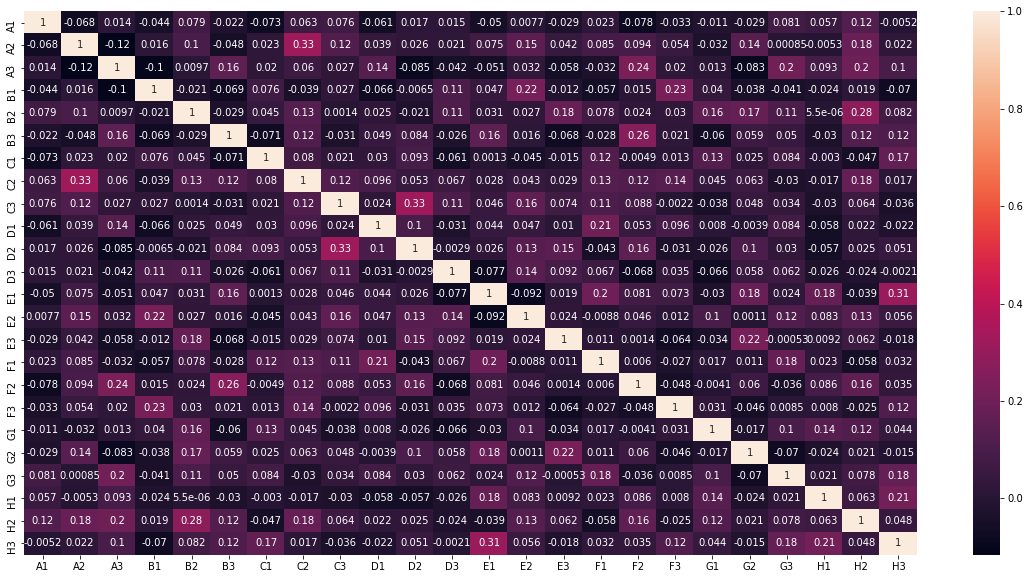

In [51]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = X.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

In [52]:

# sns.pairplot(X)


In [53]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [54]:
# r2 = []
# start = 0
# for rs in range(0,100):
    

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=33)



# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X_train,y_train)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
# print(multi_coef)
print(f"test_r2 = {multi_linear.score(X_test,y_test)}")
print(f"train_r2 = {multi_linear.score(X_train,y_train)}")

# r2.append(multi_linear.score(X_test,y_test))

# for i,r in enumerate(r2):
#     if r>0.59 and r< 0.67:
#         print(f"{i+start}: {r}")


test_r2 = 0.6006721576748102
train_r2 = 0.6114327988775574


#### Printing the individual $\beta$ values

In [55]:
print(f"Coefficients: {multi_coef}")
print(f"Intercept: {multi_linear.intercept_}")

Coefficients: [ -3.10909729  -3.82101526 -11.59121008   2.65195639  -1.47589681
  -3.71962118  -5.63874441   1.9632679   -3.32835406  -4.79906034
  -2.05485325 -12.95328766   6.91973843  -1.92969093  -4.18032322
 -24.49900327 -51.61339398 -67.11473428  -6.07503272  -2.92866424
  -5.61296263   0.16189943  -1.80817274  -6.03234777]
Intercept: 77.0976247072957


[Text(0, 0.5, 'target'),
 Text(0.5, 0, 'predicted'),
 Text(0.5, 1.0, 'test PCI predicted vs target')]

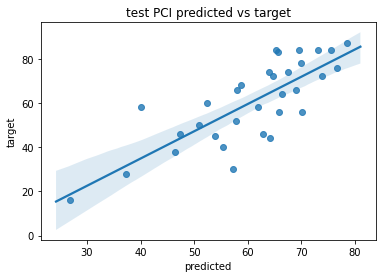

In [56]:

x_test_prediction = multi_linear.predict(X_test)
ax = sns.regplot(x=x_test_prediction, y=y_test)
ax.set(title = 'test PCI predicted vs target', xlabel='predicted', ylabel='target')

[Text(0, 0.5, 'target'),
 Text(0.5, 0, 'predicted'),
 Text(0.5, 1.0, 'train PCI predicted vs target')]

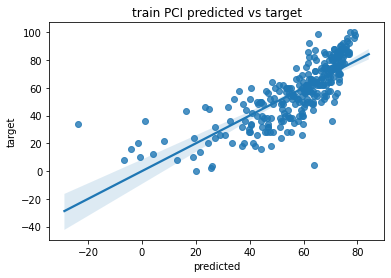

In [57]:
x_train_prediction = multi_linear.predict(X_train)

ax = sns.regplot(x=x_train_prediction, y=y_train,)
ax.set(title = 'train PCI predicted vs target', xlabel='predicted', ylabel='target')



In [58]:

# # Initialize a list to store the beta values for each linear regression model
# linear_coef = []
# linear_score = []

# # Loop over all the predictors
# # In each loop "i" holds the name of the predictor 
# for i in X_train:
    
#     # Set the current predictor as the variable x_train
#     x_train = X_train[[i]]

#     # Create a linear regression object
#     linreg = LinearRegression()

#     # Fit the model with training data 
#     # Remember to choose only one column at a time i.e. given by x_train (not X_train)
#     linreg.fit(x_train,y_train)
    
#     # Add the coefficient value of the model to the list
#     linear_coef.append(linreg.coef_)
#     linear_score.append(linreg.score(X_test[[i]], y_test))
    
# linear_coef
# linear_score
